<a href="https://colab.research.google.com/github/RaymondLeong94/Flatiron_Capstone_Project-/blob/main/Final_Notebook_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yelp NLP project

Part Four of Four

Raymond Leong

#Using Yelp's dataset to help PA restaurants identify areas of improvement in Service or Food Quality. 

Notebook 1: https://github.com/RaymondLeong94/Flatiron_Capstone_Project-/blob/main/Notebook1%20Preliminary%20EDA%20and%20FE.ipynb

Notebook 2: https://github.com/RaymondLeong94/Flatiron_Capstone_Project-/blob/main/Notebook%202%20EDA_Entity%20Extraction_other%20FE.ipynb

Notebook 3: https://github.com/RaymondLeong94/Flatiron_Capstone_Project-/blob/main/Notebook%203%20Modeling.ipynb

Notebook 4 will use google collab to expand the vocabulary size with word to vec and then use our final chosen model method

# Business problem
________________________

Yelp reviews can come in handy for a variety of reasons, for instance identifying key nouns and adjectives can help resturant owners and investors can bring clarity to investors. In our business case, we are interested in identifying nouns related to service or food - in hopes that we can start identifying statements that can improve either hospitality or food quality. Together these two are the ingredients for a successful resturant that we aim to look at for our stakeholders

# Stakeholders
_______________________

The stake holder would be someone who has multiple restaurants in Philadelphia and they want to identify which aspects of their business (service or food quality) to improve first based on yelp reviews and other attributes in order to obtain higher star ratings.

#Data
______________
For this project we will be utilizing yelp's dataset which can be found here: https://www.yelp.com/dataset/download. This dataset is provided by yelp and contains 5 different JSON files.

The first is buisness

it contains: the id of the buisness, business name, address, city, state, postal code, lat, long, stars, review count, is it open?, attributes, categories, and hours

For this first one we will be utilizing all features. except some locational attributes name, address, state, postal code. Some attributes are of usage to us, categories needs to be .exploded() in order to obtain resturants and establisments related to food. Hours can be generated. 

Please refer to Notebook 3 for the full code for: final_pre_processed_data, a json file that combines business and the "review.json"

The second one is review.json 

It contains review id, user id, business id, stars, date, text, useful, funny and cool (the latter 3 being # of votes received by other consumers). We will only be interested in user_id, buisness id_, stars, and text. 

The third one is users: we will not have time to explode this 

The fourth one is checkin.json we will not have time to explode this 

The fifth one is tip.json
This one is important because it represents an abbreviated form of review, we are interested in seeing how this works and have explored that tips do not work as well as the full text from a ML perspective.

 

## Preprocessing the data:
____________
Final_preprocessed_data.json is the merge of business.json and reviews that have their entities extracted. The rows populated are PA restaurants only.

EDA.JSON is the same as final_preprocessed_data except without entities and other NLP tasks. It is for feature engineering.

In [ ]:
#import pandas and mount drive 

import pandas as pd
import json
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
#change directory
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [2]:
#import the file from notebook 2 titled "final_preprocessed_data" which contains all the restaurants and food establishments in philly
import json
preprocessed3 = pd.read_json('/content/gdrive/MyDrive/final_preprocessed_data.json', encoding='utf8') 

In [3]:
#we have entities and their respective nouns and adjectives for each review
preprocessed3['entities']

0        (S\n  nice/JJ\n  little/JJ\n  bakery/JJ\n  hea...
1        (S\n  bakery/NN\n  usually/RB\n  go/VBP\n  chi...
2        (S\n  delightful/JJ\n  find/VBP\n  chinatown/J...
3        (S\n  order/NN\n  graduation/NN\n  cake/VB\n  ...
4        (S\n  hkstyle/JJ\n  milk/NN\n  tea/IN\n  four/...
                               ...                        
67359    (S\n  cute/JJ\n  coffee/NN\n  shop/NN\n  aroun...
67360    (S\n  nice/JJ\n  cash/NN\n  coffee/NN\n  spot/...
67361    (S\n  hand/NN\n  best/JJS\n  ice/NN\n  coffee/...
67362    (S\n  place/NN\n  great/JJ\n  super/JJ\n  chil...
67363    (S\n  neighborhood/NN\n  gem/NN\n  owner/NN\n ...
Name: entities, Length: 65698, dtype: object

Looking at sentiment analysis of nouns and adjectives

In [5]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.5 MB/s eta 0:00:00


In [6]:
preprocessed3.nouns_adjec =preprocessed3.nouns_adjec.astype(str)


In [7]:
#get vader sentiment analysis going to cross compare 


def sentiment_scores(sentence):

    """
    This function serves as vader's provided documentation for sentiment, when we look at the thresholds, we consider scores less than -.1 as negative, and higher than .1 as positive
    In between is neutral, which we would like to minimize 
    Ihave tried adaptive thresholds for finding the proper range but settled for the default due to it's pervalence across other language models
    """

    sid_obj = SentimentIntensityAnalyzer()
    #obtain sentance and find the score via the polarity_score fx 
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    if sentiment_dict['compound'] >= 0.1 :
        return "Positive"
 
    elif sentiment_dict['compound'] <= - 0.1 :
        return "Negative"
 
    else :
        return "Neutral"

preprocessed3['vader_nouns_adjecs']= preprocessed3['nouns_adjec'].map(sentiment_scores)

Visualizing the distribution

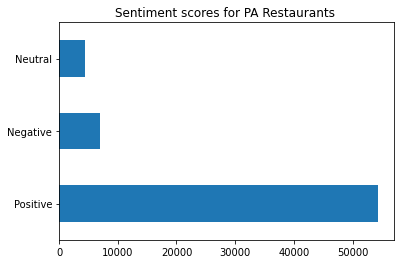

In [ ]:
import matplotlib.pyplot as plt
preprocessed3['vader_nouns_adjecs'].value_counts().plot(kind='barh')
ax = plt.title("Vader Score for Nouns and Adjectives")
ax = plt.title("Sentiment scores for PA Restaurants ")
plt.show()


In [21]:
#this dataset is business data except with the attributes exploded and only resturants/food places in PA are listed
#this is the distinct businesses of pa restaurants
pd.set_option('mode.chained_assignment', None)
EDA = pd.read_csv('/content/gdrive/MyDrive/EDA.csv', encoding='utf8')


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (17,18,43,49,50,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
#drop the extra star
EDA = EDA.dropna(subset=['stars_y'])

In [23]:
#fill the na this time with really low time differences like 30 minutes 
#still doesnt cut out the 0 but at least it gives us smaller hours 
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
EDA[days] = EDA[days].astype(str)
EDA[days] = EDA[days].fillna('1:0-1:30')


In [24]:
#refer to notebook 1 

def calculate_hours(row: pd.Series) -> float:
    """The point of this function is to take the row which is the format "x:y-a:b"
    and x:y is the opening time and a:b is the closing time
    then we seperate x and a and y and b  into opening/closing time respectively
    we finally make it that if start hour = to end hour then it returns 0 for the closed resturants. we can aslo assume that we would want our resturant to be open for more than 12 hours.
    """
    try:
        # split the given times to start and end time
        opening_time, closing_time = row.split("-")
        # split hours and minutes
        start_hour, start_minute = opening_time.split(":")
        end_hour, end_minute = closing_time.split(":")
        # calculate start time (in hours)
        start_time = float(start_hour) + float(start_minute) / 60
        # calculate end time (in hours)
        end_time = float(end_hour) + float(end_minute) / 60
        # handle overneight and 24h openings
        if start_time >= end_time:
            end_time += 24
        # return the duration from start time to end time
        return end_time - start_time
        
    except:
        return 0.0


In [25]:
#get weekend hours
EDA["weekend_hours"]=  EDA["Friday"].apply(calculate_hours) +\
             EDA["Saturday"].apply(calculate_hours) +\
             EDA["Sunday"].apply(calculate_hours)

In [26]:
#the function didnt account for 00;00- 00;00 and reads as 24 so we can replace 24,48,72 with 0 hours 

EDA["weekend_hours"] = EDA["weekend_hours"].astype(str).replace('72.0', '0')

EDA["weekend_hours"] = EDA["weekend_hours"].astype(str).replace('72.00', '0')
EDA["weekend_hours"] = EDA["weekend_hours"].astype(str).replace('48.00', '0')

In [27]:
EDA['weekend_hours'] = EDA['weekend_hours'].astype(float)

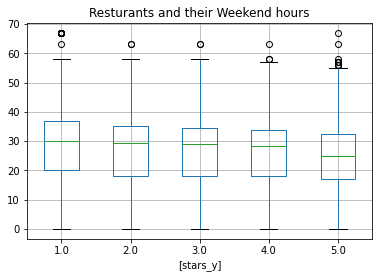

In [28]:
#obtain weekend hours
import matplotlib.pyplot as plt
EDA['stars_y']=  EDA['stars_y'].astype(float)
ax= EDA.boxplot(column=['weekend_hours'], by = ['stars_y'])
plt.title("Resturants and their Weekend hours")
plt.suptitle('')

plt.show()


In [29]:
#simple OLS model to see if theres any linear correlation 

from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.formula.api import ols
Y = preprocessed3['stars_y']
X = preprocessed3[['weekend_hours']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

print("_____________________________")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                            OLS Regression Results                            
Dep. Variable:                stars_y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1196.
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          1.22e-259
Time:                        03:30:45   Log-Likelihood:            -1.0975e+05
No. Observations:               65698   AIC:                         2.195e+05
Df Residuals:                   65696   BIC:                         2.195e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.2474      0.013    328.770

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


There is no linear correlation between hours opened and stars let us look at the correlation between stars and the nouns_adjectives columns for each individual review

In [30]:
 practice_set= preprocessed3

In [31]:
#start by looking at at the columns and stars
practice_set= practice_set[['nouns_adjec', 'stars_y']]

In [32]:
practice_set

,nouns_adjec,stars_y
0,"'heart', 'philadelphia', 'female', 'cashier', ...",4
1,"'bakery', 'variety', 'bun', 'pastry', 'bun', '...",4
2,"'kind', 'service', 'everyone', 'treat', 'treat...",5
3,"'order', 'graduation', 'event', 'staff', 'nice...",5
4,"'milk', 'saint', 'honore', 'pastry', 'business...",4
...,...,...
67359,"'coffee', 'shop', 'work', 'price', 'variety', ...",5
67360,"'cash', 'coffee', 'spot', 'cozy', 'spot', 'cof...",3
67361,"'hand', 'ice', 'coffee', 'terrific', 'guy', 'c...",5
67362,"'place', 'chill', 'corner', 'coffee', 'shop', ...",5


In [33]:
#idea from https://www.youtube.com/watch?v=Fuw0wv3X-0o
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [34]:
#convert
practice_set['nouns_adjec']= practice_set['nouns_adjec'].astype(str)

In [35]:
#make sure there are no nan values
practice_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65698 entries, 0 to 67363
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nouns_adjec  65698 non-null  object
 1   stars_y      65698 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [36]:
#replace the elements so that the tokenizer can do its job
practice_set['nouns_adjec'] = practice_set['nouns_adjec'].astype(str).apply(lambda x: x.replace('"', ''))
practice_set['nouns_adjec'] = practice_set['nouns_adjec'].apply(lambda x: x.replace('[', ''))
practice_set['nouns_adjec'] = practice_set['nouns_adjec'].apply(lambda x: x.replace(']', ''))
practice_set['nouns_adjec'] = practice_set['nouns_adjec'].apply(lambda x: x.replace(',', ''))
practice_set['nouns_adjec'] =practice_set['nouns_adjec'].apply(lambda x: x.replace(", '", "'"))
practice_set['nouns_adjec'] =practice_set['nouns_adjec'].apply(lambda x: x.replace("'", ""))

In [37]:
#create the 'top' restaurants based off teh discussion thus far
top_rest_cv= practice_set[(practice_set['stars_y'] >= 3)]

In [39]:
#this accounts for more than 75% of the reviews, the output is heavily weighed towards positive reviews anyways
top_rest_cv

,nouns_adjec,stars_y
0,heart philadelphia female cashier pastry show ...,4
1,bakery variety bun pastry bun mung coconut stu...,4
2,kind service everyone treat treat judgement th...,5
3,order graduation event staff niceniece perfect...,5
4,milk saint honore pastry business boyfriend ti...,4
...,...,...
67359,coffee shop work price variety beverage cold c...,5
67360,cash coffee spot cozy spot coffee medium latte...,3
67361,hand ice coffee terrific guy counter try apart...,5
67362,place chill corner coffee shop baristaowner ne...,5


Model with CV to look at 30 most ocmmon words of top rest

Text(0.5, 1.02, 'Word analysis through Count Vectorization')

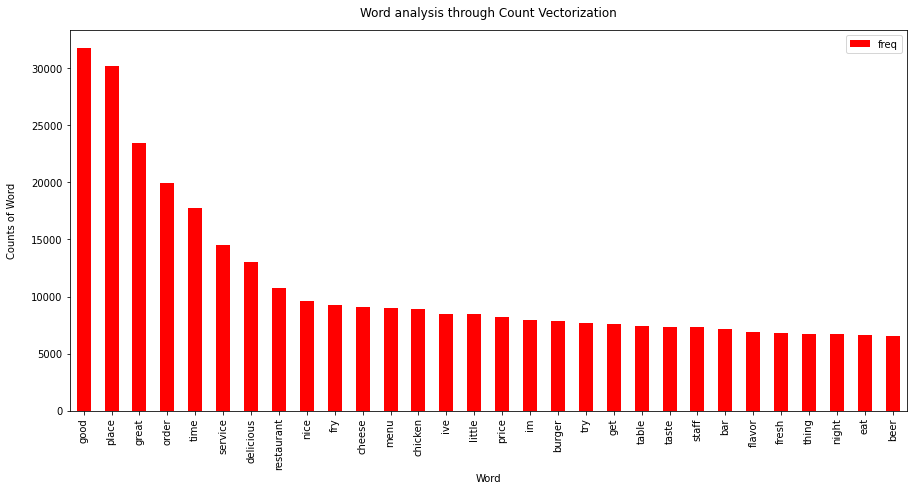

In [40]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
#set X to encompass all tweet_text 
X=None
X = top_rest_cv['nouns_adjec']


#use the CV classifier to pass the column without a tokenizer, preprocessor and set lowercase=False 
cv = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             lowercase=False)
#creates a sparse matrix
words = cv.fit_transform(X)
#add all the values into a variable called sum_words
sum_words = words.sum(axis=0)

#for every word in cv.vocabulary.items (which returns a list), add it to the unique count
#gives off a list of tuples' (item',count) that resembles a pd
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
#sort by ascending order
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create the df
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
#use iloc next time
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.xlabel("Word")
plt.ylabel("Counts of Word", labelpad=14)
plt.title("Word analysis through Count Vectorization", y=1.02)

In [41]:
#low reviews
low_rest_cv= practice_set[(practice_set['stars_y'] <= 3)]

Text(0.5, 1.02, 'Word analysis through Count Vectorization')

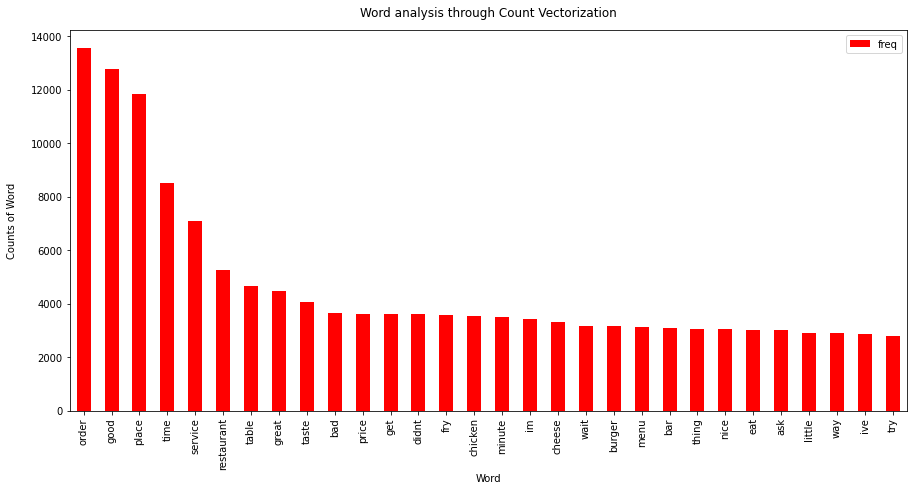

In [42]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
#set X to encompass all tweet_text 
X=None

sum_words= None
words_freq = None
frequency = None
X = low_rest_cv['nouns_adjec']


#use the CV classifier to pass the column without a tokenizer, preprocessor and set lowercase=False 
cv = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             lowercase=False)
#creates a sparse matrix
words = cv.fit_transform(X)
#add all the values into a variable called sum_words
sum_words = words.sum(axis=0)

#for every word in cv.vocabulary.items (which returns a list), add it to the unique count
#gives off a list of tuples' (item',count) that resembles a pd
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
#sort by ascending order
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create the df
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
#use iloc next time
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.xlabel("Word")
plt.ylabel("Counts of Word", labelpad=14)
plt.title("Word analysis through Count Vectorization", y=1.02)

Model with W2V

In [43]:
#import gensim for word to vec
import nltk
from gensim.models import Word2Vec, KeyedVectors


In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [45]:
practice_set['nouns_adjec']

0        heart philadelphia female cashier pastry show ...
1        bakery variety bun pastry bun mung coconut stu...
2        kind service everyone treat treat judgement th...
3        order graduation event staff niceniece perfect...
4        milk saint honore pastry business boyfriend ti...
                               ...                        
67359    coffee shop work price variety beverage cold c...
67360    cash coffee spot cozy spot coffee medium latte...
67361    hand ice coffee terrific guy counter try apart...
67362    place chill corner coffee shop baristaowner ne...
67363    neighborhood gem owner guy place spot hang wor...
Name: nouns_adjec, Length: 65698, dtype: object

In [46]:
from nltk import word_tokenize
nltk.download('punkt') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
practice_set['nouns_adjec']= practice_set['nouns_adjec'].astype(str)

Tokenize prior to analysis

In [48]:
corpus =  practice_set['nouns_adjec'].map(word_tokenize)


In [ ]:
#these are the words we're analyzing
corpus

0                                                                                                                                                                                  [heart, philadelphia, female, cashier, pastry, show, display, case, evening, sesame, ball, paste, rice, ball, bai, tang, gao, areanice, little, bakery, chinatown, flirtatious, adorn, fill, bean, glutinous, similar, place, worth]
1                                                                                                                             [bakery, variety, bun, pastry, bun, mung, coconut, stuff, egg, tart, dozen, price, standard, thing, service, serve, coffee, tea, couple, group, guy, chillin, corner, debate, something, place, stock, bun, townchinatown, decent, beanfilled, bun, free, good, table, old, table, great]
2                                                                                                                                                                                       

In [49]:
#phrases will allow us to analyze words in pairs 
from gensim.models import Phrases

# Train a bigram detector.
bigram_transformer = Phrases(corpus)

# Apply the trained MWE detector to a corpus, using the result to train a Word2vec model.
bi_gram_model = Word2Vec(bigram_transformer[corpus], min_count=1)

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


<ipython-input-54-cb288308a323>:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  list_model_manager= bi_gram_model.most_similar('waiter')


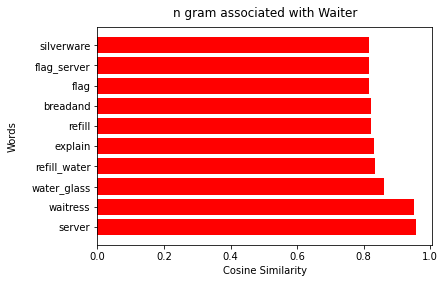

In [54]:
#look at the bigram most similar to waitress
list_model_manager= bi_gram_model.most_similar('waiter')
list_model_manager
word = []
frequency = []

for i in range(len(list_model_manager)):
  word.append(list_model_manager[i][0])
  frequency.append(list_model_manager[i][1])


plt.barh(word, frequency, color='r')

plt.xlabel("Cosine Similarity")
plt.ylabel("Words", labelpad=14)
plt.title("n gram associated with Waiter", y=1.02)
plt.show()


So here we see that scores associated with waiter that are high in cosine similarity would be to address the actions such as refilling water, explaining menues, noticing when customer requires attention. Lets look at more

In [57]:
#min count = 1 for freq 
#vectorsize = 100 
#windows = amount it will go left and right 
model = Word2Vec(corpus, size=300, min_count = 1, window = 10)

In [58]:
vocabulary = model.wv.vocab

In [59]:
model1 = model.wv

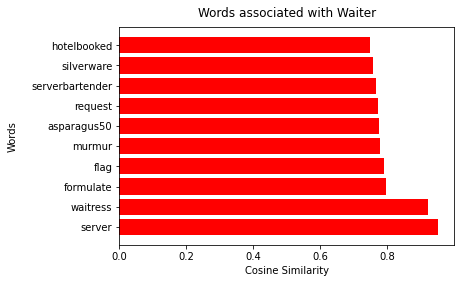

In [61]:
list_model_manager= model1.most_similar('waiter')
list_model_manager
word = []
frequency = []

for i in range(len(list_model_manager)):
  word.append(list_model_manager[i][0])
  frequency.append(list_model_manager[i][1])


plt.barh(word, frequency, color='r')

plt.xlabel("Cosine Similarity")
plt.ylabel("Words", labelpad=14)
plt.title("Words associated with Waiter", y=1.02)
plt.show()


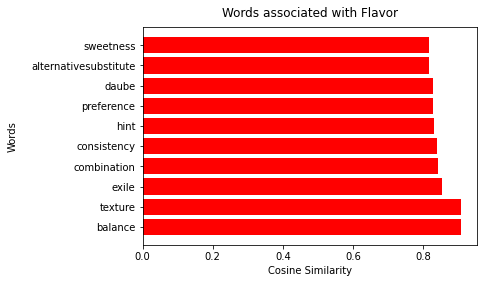

In [62]:
list_model_flavor= model1.most_similar("flavor")

word = []
frequency = []

for i in range(len(list_model_flavor)):
  word.append(list_model_flavor[i][0])
  frequency.append(list_model_flavor[i][1])


plt.barh(word, frequency, color='r')
plt.xlabel("Cosine Similarity")
plt.ylabel("Words", labelpad=14)
plt.title("Words associated with Flavor", y=1.02)
plt.show()

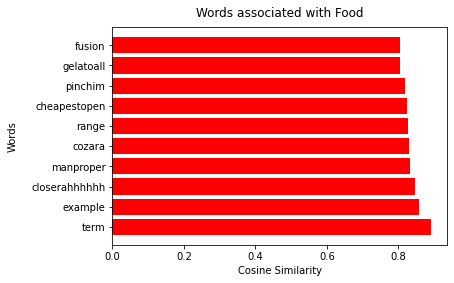

In [63]:
list_model_flavor= model1.most_similar("food")

word = []
frequency = []

for i in range(len(list_model_flavor)):
  word.append(list_model_flavor[i][0])
  frequency.append(list_model_flavor[i][1])


plt.barh(word, frequency, color='r')
plt.xlabel("Cosine Similarity")
plt.ylabel("Words", labelpad=14)
plt.title("Words associated with Food", y=1.02)
plt.show()

In [64]:
for_keras= practice_set['nouns_adjec'].values

In [66]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [67]:
#vocab size, one hot for keras 
vocab_size = 300
encoded_reviews = [one_hot(x, vocab_size) for x in for_keras]
print(encoded_reviews)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [68]:
max_length = 10
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
print(padded_reviews)

[[225 294 223 ... 222  54 299]
 [ 56 132  32 ...  94 147 271]
 [119 203 199 ... 214 242 155]
 ...
 [ 63 206 127 ... 127 180 191]
 [277  27 277 ...  28  15 199]
 [169 215  54 ...  31 271 214]]


In [69]:
embeded_vector_size = 5
model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length, name = "embedding"))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [70]:
practice_set.columns

Index(['nouns_adjec', 'stars_y'], dtype='object')

In [71]:
def stars_transform(x):
  if x >= 3.5:
    return 1
  else:
    return 0 


practice_set['stars_y'] = practice_set['stars_y'].apply(stars_transform)

In [72]:
practice_set['stars_y'].value_counts()

1    45608
0    20090
Name: stars_y, dtype: int64

In [73]:
sentiment = practice_set['stars_y'].values.flatten()

In [74]:
X = padded_reviews
y=sentiment

In [75]:
sentiment


array([1, 1, 1, ..., 1, 1, 1])

In [76]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 5)             1500      
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(X, y, epochs=50, verbose=0)

In [78]:
loss, accuracy = model.evaluate(X,y)
accuracy

2054/2054 [==============================] - 4s 2ms/step - loss: 0.4967 - accuracy: 0.7574


0.7574355602264404

In [79]:
model.get_layer('embedding').get_weights()[0]

array([[-0.14432722,  0.10198139, -0.08354782,  0.16448036, -0.16814466],
       [-0.18789643, -0.16833805,  0.06182377, -0.3126696 ,  0.07632001],
       [-0.5041636 , -0.17869663,  0.30787897,  0.11952055, -0.22242633],
       ...,
       [ 0.43661034, -0.01388535,  0.23481809,  0.50546926, -0.21864313],
       [ 0.32559994,  0.28244582,  0.39330038,  0.12995213, -0.09276006],
       [-0.10037865,  0.24062893, -0.28107136,  0.33685556,  0.00717293]],
      dtype=float32)

# Discussion
Although the accuracy of the model is sub-80, actions prescribed can be validated by feeding in more data into the model. 

## Food Recommendations 

Tips are preferred compared to the full text.
The words; balance and texture appear most similar with flavor.


Some areas of flavor to explore might be spice and sweet flavors that have ‘hints’ of other ‘combinations’


Additionally, consistency with flavor appears to high in similarity scores
Waiter and Waitress show similar cosine similarity scores for certain behaviors.

## Service Recommendations

Refilling water is associated with the job, so a business recommendation may be to advise your staff to walk around with water when busy.

Another task is probably taking orders from customers, don’t overcomplicate things or arrive too early before they’ve made up their mind on their order.


